In [1]:
import pandas as pd
import numpy as np
import re

### Polity

In [ ]:
df1 = pd.read_csv('/Volumes/NJ_4TB/Final/Polity.csv', skipinitialspace=True)
df1.drop(df1[(df1['year'] <1985) | (df1['year'] > 2020 )].index, inplace=True)
polity_countries = pd.unique(df1['country'])

In [ ]:
r = re.compile(".*Nethe", re.IGNORECASE)
print(list(filter(r.match, polity_countries)))

In [2]:
polity_patsat_countries={ 'KR':'Korea South',
                         'MX':'Mexico',
                         'EG':'Egypt',
                         'JP':'Japan',
                         'NO':'Norway',
                         'CA':'Canada',
                         'SI':'Slovenia',
                         'DK':'Denmark',
                         'TH':'Thailand',
                         'FI':'Finland',
                         'HU':'Hungary',
                         'IS':'Iceland',
                         'IN':'India',
                         'US':'United States                   ',
                         'CZ':['Czechoslovakia', 'Czech Republic'],
                         'CL':'Chile',
                         'PL':'Poland',
                         'LV':'Latvia',
                         'KY':'Cayman Islands (the)',
                         'PH':'Philippines',
                         'DE':['Germany East', 'Germany', 'Germany West'],#also DD
                         'SG':'Singapore',
                         'CH':'Switzerland',
                         'LT':'Lithuania',
                         'CY':'Cyprus',
                         'RU':'Russia',
                         'UA':'Ukraine',
                         'IT':'Italy',
                         'AU':'Australia',
                         'NZ':'New Zealand',
                         'BE':'Belgium',
                         'QA':'Qatar',
                         'MY':'Malaysia',
                         'BM':'Bermuda',
                         'AT':'Austria',
                         'SU':'USSR',
                         'GR':'Greece',
                         'MT':'Malta',
                         'IE':'Ireland',
                         'TR':'Turkey',
                         'ES':'Spain',
                         'NL':'Netherlands',
                         'IL':'Israel',
                         'MA':'Morocco',
                         'AE':'UAE',
                         'CU':'Cuba',
                         'SE':'Sweden',
                         'CN':'China',
                         'FR':'France',
                         'LU':'Luxembourg',
                         'PA':'Panama',
                         'BG':'Bulgaria',
                         'ZA':'South Africa',
                         'TW':'Taiwan',
                         'AR':'Argentina',
                         'BR':'Brazil',
                         'GB':'United Kingdom',
                         'SA':'Saudi Arabia'
                       }

In [ ]:
my_list = []
for patsat_country, pol_country in polity_patsat_countries.items():
    polity = 0
    if not(patsat_country == 'CZ' or patsat_country == 'DE'):
        pol_country = [pol_country]
    for year in range( 1985,  2020 + 1):
        polity = 0.0
        num = 0.0
        for country in pol_country:              
            arr = df1[(df1['country'] == country) & (df1['year'] == year)]['polity2'].to_numpy()
            if arr.size:
                polity += arr[0]
                num += 1.0
            else:
                if (patsat_country == 'CZ' or patsat_country == 'DE'):
                    polity += 0.0
                else:
                    polity = np.NaN
        if num:
            polity = polity / num
        my_list.append({'year':year,'country':patsat_country,'polity':polity})
df_polity = pd.DataFrame.from_records(my_list)
df_polity.to_csv('/Volumes/NJ_4TB/Final/polity_processed.csv', encoding='utf-8', index=False)

### Total Patents by Country

In [ ]:
df1 = pd.read_csv('/Volumes/NJ_4TB/Final/Total_patent_count_by filing_office_1980_2020.csv', skipinitialspace=True, skiprows=6)
total_patents=[]
for country in polity_patsat_countries.keys():
    for year in range(1985, 2020+1):
        val = df1[df1['Unnamed: 0']==country][str(year)]
        if val.size:
            val=val[0]
        else:
            val = np.NaN
        total_patents.append({'country':country,'year':year,'control_total_patents':val})
df_patents = pd.DataFrame.from_records(total_patents)
# now DD
for year in range(1985, 2020+1):
    val = df1[df1['Unnamed: 0']=='DD'][str(year)]
    if val.size and val[0]==val[0]:
        df_patents.at[ np.where((df_patents['year'] == year) & (df_patents['country'] == 'DE') )[0][0],'control_total_patents'] += val[0]

df_patents.to_csv('/Volumes/NJ_4TB/Final/patent_processed.csv', encoding='utf-8', index=False)

### GDP by Country

In [ ]:
df1 = pd.read_csv('/Volumes/NJ_4TB/Final/GDPperCA.csv', skipinitialspace=True)
df1.drop(df1[df1['Series Name']!='GDP per capita (constant 2015 US$)'].index,inplace=True)

In [ ]:
r = re.compile(".*germ", re.IGNORECASE)
print(list(filter(r.match, df1['Country Name'].to_list())))

In [ ]:
gdp_patsat_countries={ 'KR':'KOR',
                         'MX':'MEX',
                         'EG':'EGY',
                         'JP':'JPN',
                         'NO':'NOR',
                         'CA':'CAN',
                         'SI':'SVN',
                         'DK':'DNK',
                         'TH':'THA',
                         'FI':'FIN',
                         'HU':'HUN',
                         'IS':'ISL',
                         'IN':'IND',
                         'US':'USA',
                         'CZ':['CZE', 'SVK'],
                         'CL':'CHL',
                         'PL':'POL',
                         'LV':'LVA',
                         'KY':'CYM',
                         'PH':'PHL',
                         'DE':'DEU',#also DD
                         'SG':'SGP',
                         'CH':'CHE',
                         'LT':'LTU',
                         'CY':'CYP',
                         'RU':'RUS',
                         'UA':'UKR',
                         'IT':'ITA',
                         'AU':'AUS',
                         'NZ':'NZL',
                         'BE':'BEL',
                         'QA':'QAT',
                         'MY':'MYS',
                         'BM':'BMU',
                         'AT':'AUT',
                         'SU':'',
                         'GR':'GRC',
                         'MT':'MLT',
                         'IE':'IRL',
                         'TR':'TUR',
                         'ES':'ESP',
                         'NL':'NLD',
                         'IL':'ISR',
                         'MA':'MAR',
                         'AE':'ARE',
                         'CU':'CUB',
                         'SE':'SWE',
                         'CN':'CHN',
                         'FR':'FRA',
                         'LU':'LUX',
                         'PA':'PAN',
                         'BG':'BGR',
                         'ZA':'ZAF',
                         'TW':'',
                         'AR':'ARG',
                         'BR':'BRA',
                         'GB':'GBR',
                         'SA':'SAU'
                       }

In [ ]:
my_list = []
for patsat_country, gdp_country in gdp_patsat_countries.items():
    polity = 0
    if not(patsat_country == 'CZ'):
        gdp_country = [gdp_country]
    for year in range( 1985,  2020 + 1):
        gdp = 0.0
        num = 0.0
        for country in gdp_country:              
            arr = df1[(df1['Country Code'] == country)][str(year)+" [YR"+ str(year) +"]"].to_numpy()
            if arr.size:
                if arr[0] != '..':
                    gdp += float(arr[0])
                    num += 1.0
            else:
                gdp = np.NaN
        if num:
            gdp = gdp / num
        my_list.append({'year':year,'country':patsat_country,'gdp_per_capita':gdp})
df_gdp = pd.DataFrame.from_records(my_list)
df_gdp.to_csv('/Volumes/NJ_4TB/Final/gdp_processed.csv', encoding='utf-8', index=False)

### Combine all controls

In [ ]:
combined_list=[]
for patsat_country in gdp_patsat_countries.keys():
    for year in range(1985, 2020 +1):
        combined_list.append({'year':year,'country':patsat_country,'gdp_per_capita':df_gdp[(df_gdp['country'] == patsat_country) & (df_gdp['year'] ==year)]['gdp_per_capita'].to_numpy()[0],
                             'polity':df_polity[(df_polity['country'] == patsat_country) & (df_polity['year'] ==year)]['polity'].to_numpy()[0],
                             'control_total_patents':df_patents[(df_patents['country'] == patsat_country) & (df_patents['year'] ==year)]['control_total_patents'].to_numpy()[0]})

df_combined = pd.DataFrame.from_records(combined_list)
df_combined.to_csv('/Volumes/NJ_4TB/Final/controls_processed.csv', encoding='utf-8', index=False)

In [ ]:
df_combined[df_combined['country']=='KR']

### Constructing TOTPAT

In [ ]:
import pandas as pd
import numpy as np
import re
fields1 = ['person_id', 'appln_id']
df1 = pd.read_csv('/Volumes/NJ_4TB/PATSAT/tls207_part01.csv',skipinitialspace=True, header=0,usecols=fields1)
fields2 = ['person_id', 'person_ctry_code']
df2 = pd.read_csv('/Volumes/NJ_4TB/PATSAT/tls226_part01.csv',skipinitialspace=True, header=0,chunksize=200000, usecols=fields2)
header = True
chunkid=0
for chunk in df2:
    chunk = df1.merge(chunk, on='person_id', how='inner') #filter by ids
    chunk.to_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT.csv', index=False, mode='a', header=header)
    print (chunkid)
    chunkid = chunkid + 1
    header = False

### Keep only first author

In [35]:
df_needed_countries = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_countries_to_keep.csv',skipinitialspace=True)
df1 = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT.csv',skipinitialspace=True, header=0,chunksize=1000000)
header = True
chunkid=0
for chunk in df1:
    chunk['person_ctry_code'] = chunk['person_ctry_code'].astype(str)
    chunk = chunk.merge(df_needed_countries, on='person_ctry_code', how='inner')
    chunk = chunk.drop_duplicates('appln_id') 
    chunk.to_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_unique_chunks_round1.csv', index=False, mode='a', header=header)
    print (chunkid, end=" ")
    chunkid = chunkid + 1
    header = False
    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [36]:
df1 = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_unique_chunks_round1.csv',skipinitialspace=True, header=0)
df1 = df1.drop_duplicates('appln_id')
df1.to_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_unique_final.csv', index=False)


### Merge with appln_year

In [47]:
for i in range(1,4):
    df2 = pd.read_csv('/Volumes/NJ_4TB/PATSAT/tls201_part0'+ str(i) +'.csv',skipinitialspace=True, header=0,chunksize=500000, usecols=['appln_id','appln_filing_year'])
    header = True
    chunkid=0
    for chunk in df2:
        chunk.rename(columns={"appln_filing_year": "year"},inplace=True)
        chunk = chunk.merge(df1, on='appln_id', how='inner')
        chunk.to_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_panel.csv', index=False, mode='a', header=header)
        print (chunkid, end=" ")
        chunkid = chunkid + 1
        header = False
    print(i)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 2
0 1 2 3 4 5 6 7 8 9 10 3


### Get total number of patents per year

In [38]:
df1 = pd.read_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_panel.csv')


/Users/nitashajhala/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
df = df1.copy()
df = df[df["year"]!='year'].copy()
df['year'] = pd.to_numeric(df['year'])
df_years = df[(df["year"]>=1980) & (df["year"]<=2020)].copy()
df_years.drop(columns=['person_id'], inplace=True)
df_years.rename(columns={'person_ctry_code':'country'}, inplace=True)
df_years["count"] = 1

In [43]:
df_counts=df_years.groupby(['year','country'])['count'].sum().reset_index()


In [74]:
#### assign 0 to countries when they did not make patents in a given year
df_counts_complete = df_counts.copy()
for year in pd.unique(df_counts["year"]):
    for country in pd.unique(df_counts["country"]):
        if(df_counts_complete.loc[(df_counts_complete['year'] == year) & (df_counts_complete['country'] == country), "count"].empty):
            df_counts_complete = pd.concat([pd.DataFrame([[year,country,0]], columns=df_counts_complete.columns), df_counts_complete], ignore_index=True)

In [75]:
df_counts_complete

,year,country,count
0,2020,SI,0
1,2020,ZA,0
2,2020,UA,0
3,2020,TH,0
4,2020,SG,0
...,...,...,...
1635,2020,NZ,6
1636,2020,PL,1
1637,2020,RU,1
1638,2020,SE,8


In [76]:
df_counts_complete.to_csv('/Volumes/NJ_4TB/PATSAT/MyFiles/TOTPAT_per_year.csv', index=False)

In [77]:
sumall= df_counts_complete.groupby(['year'])['count'].sum().reset_index()["count"].to_numpy()

Text(0.5, 1.0, 'Total patents per year for all countries')

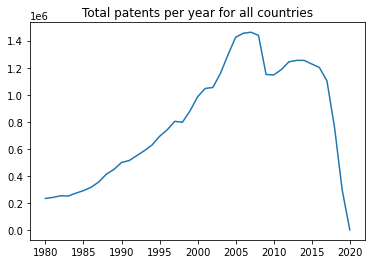

In [78]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1980,2021),sumall)
plt.title("Total patents per year for all countries")